In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Amtrak = pd.read_csv("C://Users//Swathi/Desktop//Excelr Classes//Assignments//15.Forecasting//Amtrak.csv")
Amtrak.head()

,Month,Ridership
0,Jan-91,1709
1,Feb-91,1621
2,Mar-91,1973
3,Apr-91,1812
4,May-91,1975


In [3]:
Amtrak.shape

(159, 2)

In [4]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

Here Amtrak["Month"] has JAN-93, we need to extract 1st 3 char of months column to get dummies i.e sames as = left(A1,3) in excel

In [5]:
p = Amtrak["Month"][0]
p[0:3]
Amtrak['months']= 0

for i in range(159):
    p = Amtrak["Month"][i]
    Amtrak['months'][i]= p[0:3]

C:\Users\Swathi\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Swathi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
Amtrak.head()

,Month,Ridership,months
0,Jan-91,1709,Jan
1,Feb-91,1621,Feb
2,Mar-91,1973,Mar
3,Apr-91,1812,Apr
4,May-91,1975,May


In [7]:
p[0:3]

# note before it was 'Month' but now new column 'month' - letter M capital and small

'Mar'

In [8]:
month_dummies = pd.DataFrame(pd.get_dummies(Amtrak['months']))
Amtrak1 = pd.concat([Amtrak,month_dummies],axis = 1)
Amtrak1.head()

,Month,Ridership,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-91,1709,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-91,1621,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-91,1973,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-91,1812,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-91,1975,May,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
Amtrak1["t"] = np.arange(1,160)   #time index
Amtrak1["t_squared"] = Amtrak1["t"]*Amtrak1["t"] # for ploynomial/quadratic trend
Amtrak1["log_Rider"] = np.log(Amtrak1["Ridership "]) # For multiplicative seasonality

Amtrak1.rename(columns={"Ridership ": 'Ridership'}, inplace=True)
Amtrak1.columns
# print(Amtrak1["t"])
# print(Amtrak1["t_squared"])

Index(['Month', 'Ridership', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared',
       'log_Rider'],
      dtype='object')

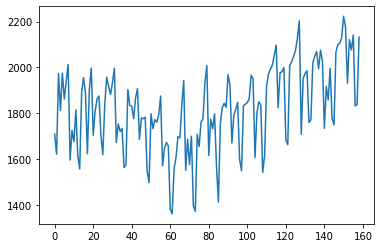

In [10]:
Amtrak1.Ridership.plot()
plt.show()

In [11]:
Train = Amtrak1.head(147)
Test = Amtrak1.tail(12)

In [12]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Ridership~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  209.92559265462603


In [13]:
##################### Exponential ##############################

Exp = smf.ols('log_Rider~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  217.05263566813403


In [14]:
#################### Quadratic ###############################

Quad = smf.ols('Ridership~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  137.1546274135608


In [15]:
################### Additive seasonality ########################

add_sea = smf.ols('Ridership~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  264.6643900568787


In [16]:
################## Additive Seasonality Quadratic ############################

add_sea_Quad = smf.ols('Ridership~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 50.6072458415344


In [17]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_Rider~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 268.1970325309225


In [27]:
##################Multiplicative Additive Seasonality ###########

Mul_Add_sea = smf.ols('log_Rider~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 172.76726784678624


In [28]:
################## Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
2,rmse_Quad,137.154627
3,rmse_add_sea,264.664390
4,rmse_add_sea_quad,50.607246
5,rmse_Mult_sea,268.197033
6,rmse_Mult_add_sea,172.767268


In [29]:
# so rmse_add_sea has the least value among the models prepared so far 


In [30]:
# Predicting new values 

predict_data = pd.read_csv("C://Users//Swathi/Desktop//Excelr Classes//Assignments//15.Forecasting//Predict_new.csv")
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_squared
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [31]:
model_full = smf.ols('Ridership~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Amtrak1).fit()

pred_new  = pd.Series(model_full.predict(predict_data))
pred_new

predict_data["forecasted_Ridership"] = pd.Series(pred_new)
# predict_data["forecasted_Ridership"]

In [32]:
Final_predict = predict_data.loc[:, ['Month', 'forecasted_Ridership']] 
Final_predict

,Month,forecasted_Ridership
0,04-Apr,2193.807626
1,04-May,2229.969736
2,04-Jun,2200.670308
3,04-Jul,2311.293957
4,04-Aug,2356.071452
5,04-Sep,2036.848947
6,04-Oct,2187.241826
7,04-Nov,2181.480859
8,04-Dec,2234.104508
9,05-Jan,1999.997498
